In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading Train and Test Datasets

In [2]:
train = pd.read_csv("/home/saf/Desktop/ict py/Analytics Vidhya/datasets/train_ctrUa4K.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv("/home/saf/Desktop/ict py/Analytics Vidhya/datasets/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
## To did'nt lose the original data set,let's make a copy of train and test data

train_org = train.copy()
test_org = test.copy()

Basic informations about the data

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In train data set,we have 12 independent variable and 1 target variable

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Test data set is almost similar to train data set,except it does'nt contain the column of Loan_Status

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
train.shape

(614, 13)

In [10]:
test.shape

(367, 12)

**Univariate Analysis**

In [11]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [12]:
## Print proportion instead of number
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

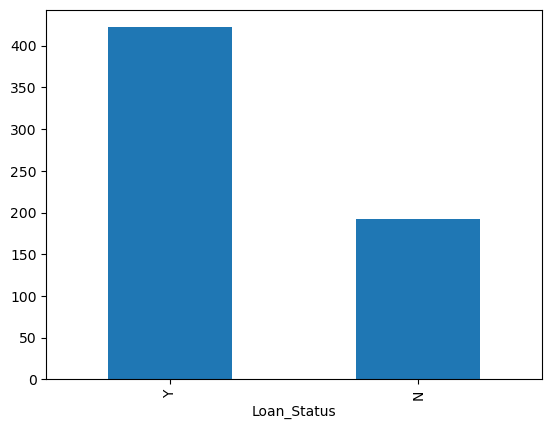

In [13]:
train['Loan_Status'].value_counts().plot.bar()

From above bar plot,we can say that about 420 people out of 614 got approval for loa

-> Visualize the categorical and ordinal features   

**Independent Variable(Categorical)** 

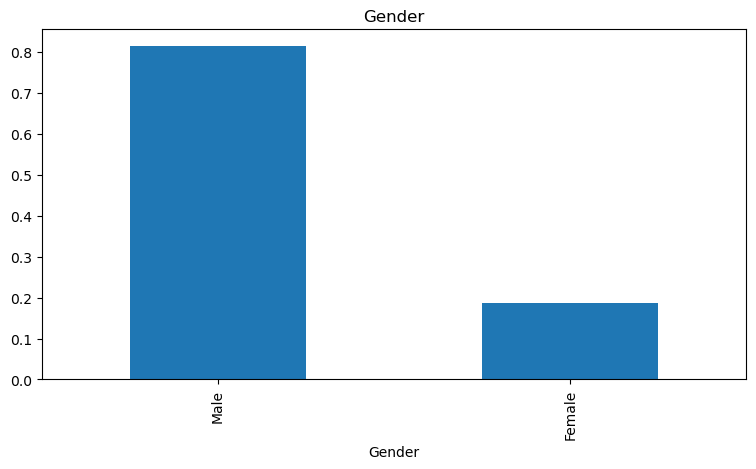

In [14]:
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.show()

> -> 80% of loan applicant in the data set are male

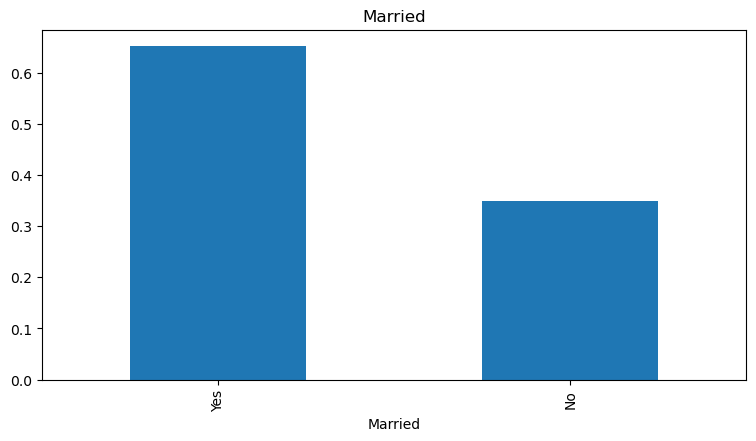

In [15]:
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Married')
plt.show()

> -> More than 60% of the applicants in the data set are married

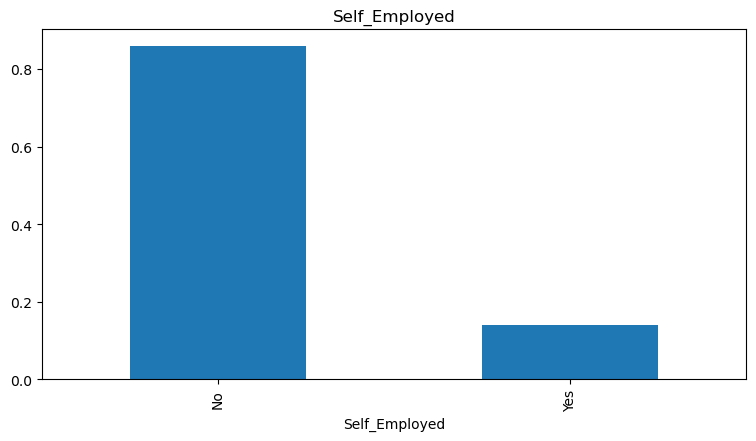

In [16]:
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Self_Employed') 
plt.show()

> -> About 20% of the applicants are self employed 

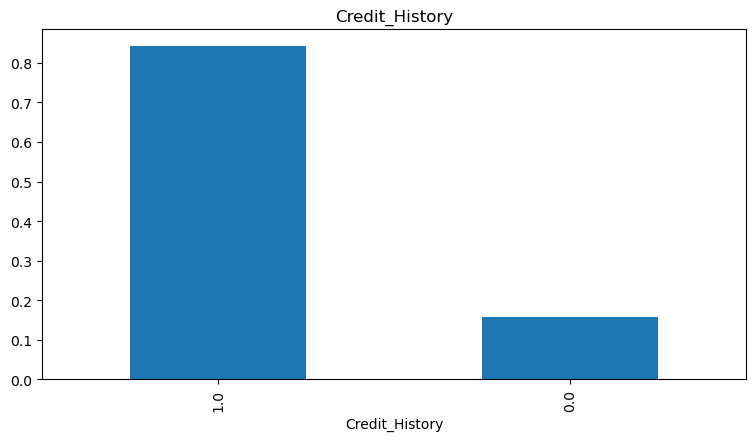

In [17]:
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Credit_History') 
plt.show()

> -> More than 80% of the applicants have paid their depts


**Independent Variable(Ordinal)**

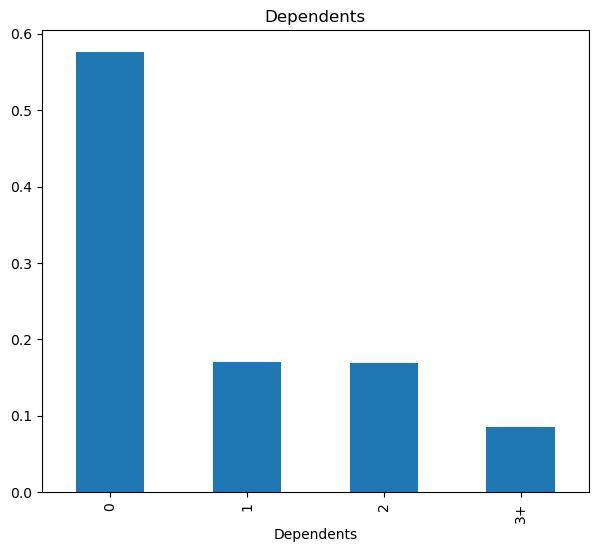

In [18]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.show()

> -> More than 60% of the applicants do not have dependents

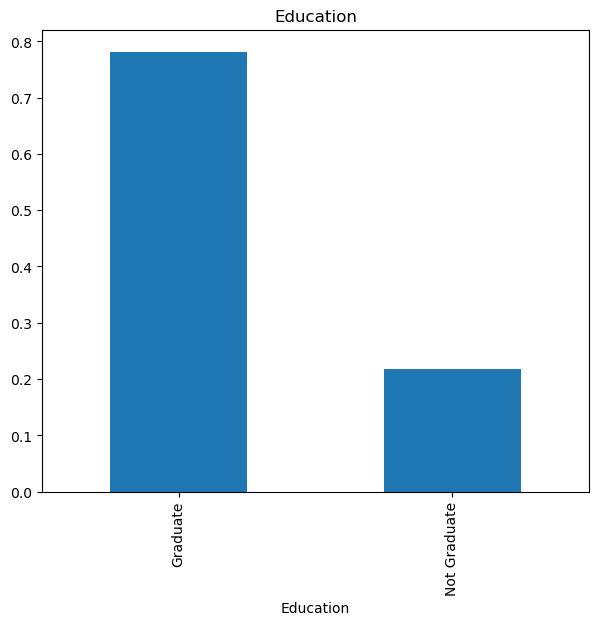

In [19]:
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title= 'Education')
plt.show()

> -> Around 80% of the applicants are Graduates

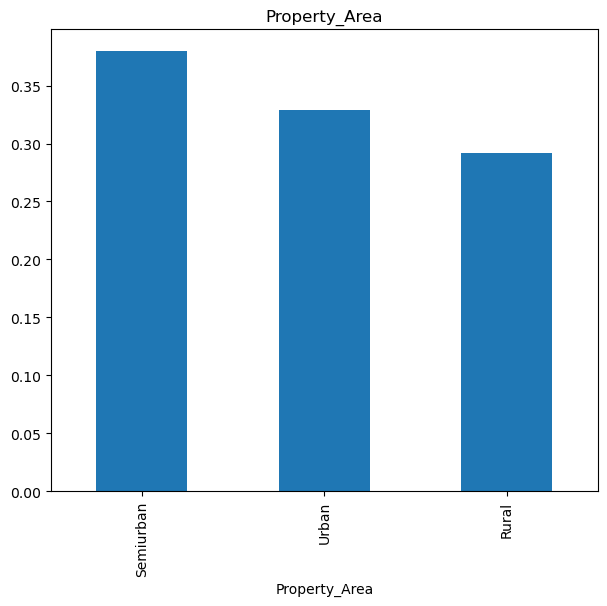

In [20]:
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title= 'Property_Area') 
plt.show()

> -> Most people are from semi-urban areas

**Independent Variable(Numerical)**

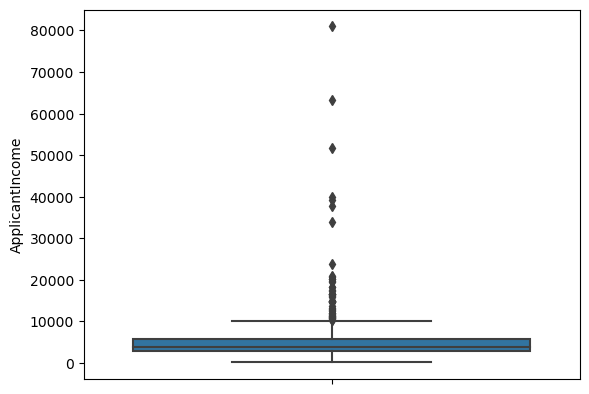

In [21]:
sns.boxplot(y = train['ApplicantIncome'])
plt.show()

**Categorical Independent Variable and Target Variable**

<AxesSubplot:xlabel='Gender'>

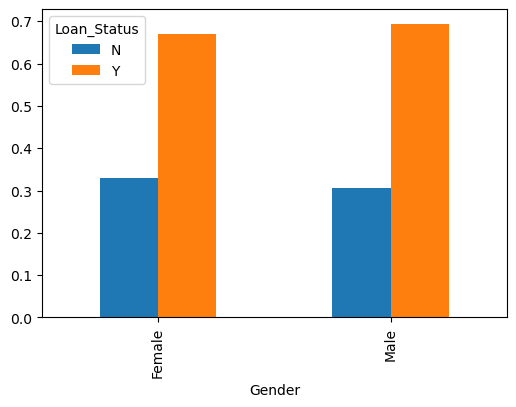

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,4))

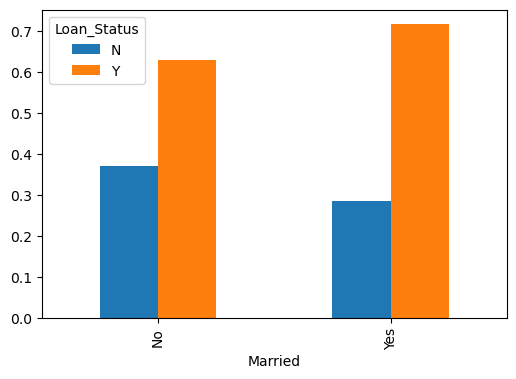

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,4)) 
plt.show()

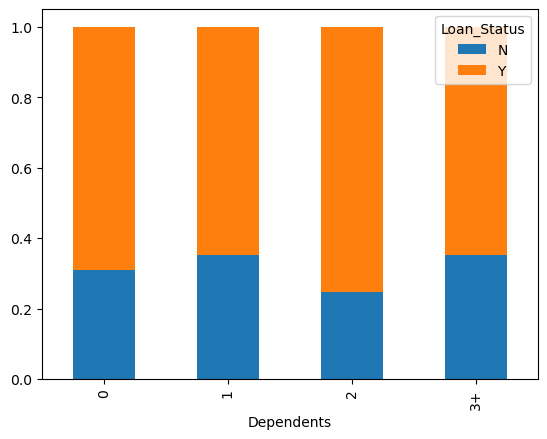

In [24]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

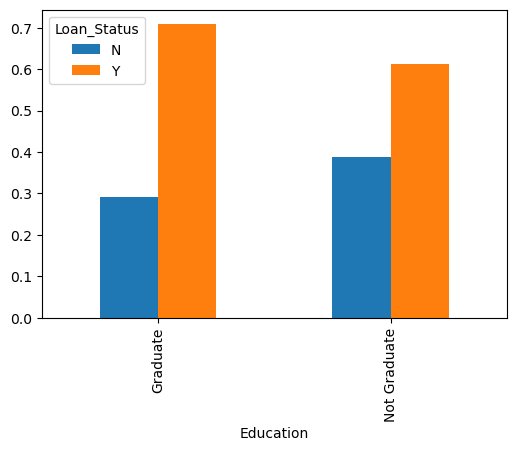

In [25]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,4)) 
plt.show()

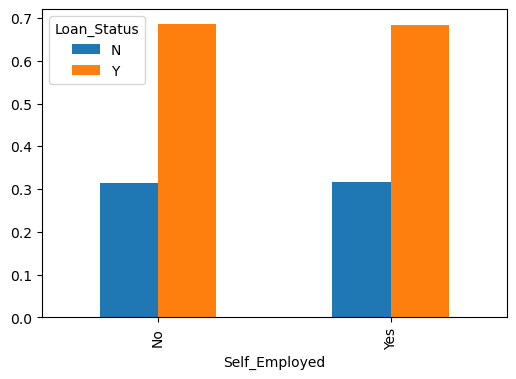

In [26]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(6,4))
plt.show()

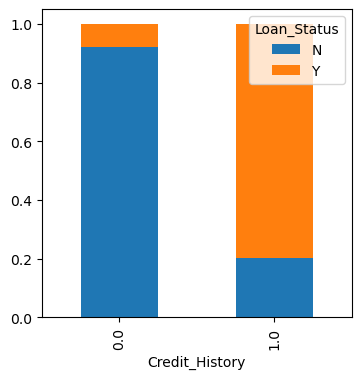

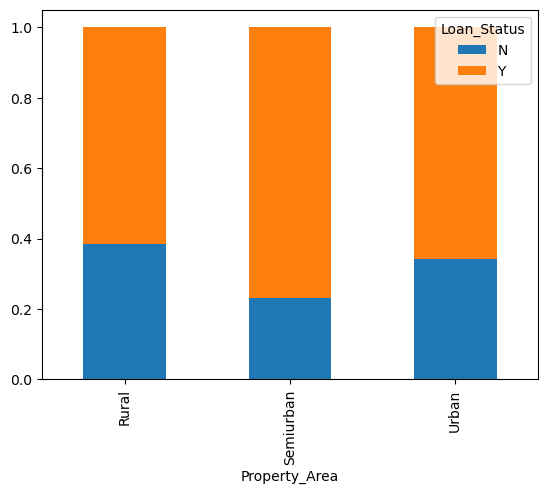

In [27]:
##  relationship between the remaining categorical independent variables and Loan_Status.
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


***#Missing Values and Outlier#***

In [28]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [30]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

**Model**

In [32]:
train = train.drop("Loan_ID",axis = 1)
test = test.drop("Loan_ID",axis = 1)

In [33]:
X = train.drop('Loan_Status',axis=1) 
y = train.Loan_Status

In [34]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [35]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,False,...,True,True,False,True,False,True,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True


In [36]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,False,True,True,False,True,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True
363,4158,709,115.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True
364,3250,1993,126.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,True,False
365,5000,2393,158.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [39]:
model = LogisticRegression() 
model.fit(x_train, y_train)

/home/saf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
pred_cv = model.predict(x_cv)

In [41]:
accuracy_score (y_cv,pred_cv)

0.7945945945945946

In [42]:
pred_test = model.predict(test)
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# Hyper Parameter Tuning

In [50]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV

In [44]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'degree' : [3, 5]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'SGDClassifier' : {
        'model' : SGDClassifier(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'max_iter': [1000, 1100, 1500, 2100, 2800, 3000],
            'learning_rate' : ['optimal']
        }
    }
}

In [51]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(x_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 3/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 5/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 6/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 7/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 8/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 9/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 10/10] END C=0.1, max_iter=300, penalty=l1, solver=solver;, score=nan total time=   0.0s
[CV 1/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 2/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 3/10] END C=1.0, max_iter=300, penalty=l2, solver=solver;, score=nan total time=   0.0s
[CV 4/10] END C=

/home/saf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/saf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/saf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/home/saf/.local/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/home/saf/.local/lib/p

[CV 1/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.605 total time=   0.0s
[CV 2/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.651 total time=   0.0s
[CV 4/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.605 total time=   0.0s
[CV 5/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.605 total time=   0.0s
[CV 3/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.744 total time=   0.1s
[CV 7/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.651 total time=   0.0s
[CV 8/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 6/10] END ..C=0.3, degree=5, kernel=sigmoid;, score=0.605 total time=   0.1s
[CV 3/10] END ......C=0.5, degree=3, kernel=rbf;, score=0.698 total time=   0.0s
[CV 1/10] END ......C=0.5, degree=3, kernel=rbf;, score=0.698 total time=   0.0s
[CV 5/10] END ......C=0.5, degree=3, kernel=rbf;, score=0.674 total time=   0.0s
[CV 4/10] END ......C=0.5, degree=3, kernel=rbf;, score=0.674 total time=   0.0s
[CV 9/10] END ..C=0.3, degre

## Final Submission

In [45]:
submission = pd.read_csv("/home/saf/Desktop/ict py/Analytics Vidhya/datasets/sample_submission_49d68Cx.csv")
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [46]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_org['Loan_ID']

In [47]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [48]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('submission.csv',index=False)

In [49]:
new_csv=pd.read_csv("/home/saf/Desktop/ict py/Analytics Vidhya/submission.csv")
new_csv

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# Test Score = 0.770833